In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
cancer = load_breast_cancer()
wine = load_wine()

In [3]:
df = pd.DataFrame(wine['data'],columns=wine['feature_names'])



In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(df)
y = wine.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,  test_size=0.3, random_state=30)

In [7]:
score = []
for i in np.arange(2,len(wine.feature_names)):
    pca = PCA(n_components=i)
    X_pca_2 = pca.fit_transform(df)
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_2, y, test_size=0.3, random_state=30)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_pca, y_train)
    score.append(model.score(X_test_pca, y_test))

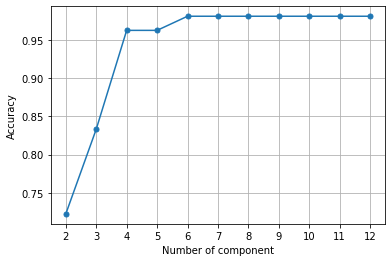

In [8]:
x = np.arange(2,len(wine.feature_names))
plt.plot(x[:12],score[:12], marker = ".", markersize = 10)
plt.grid(True)
plt.xticks(x[:12])
plt.xlabel('Number of component')
plt.ylabel('Accuracy')
plt.show()

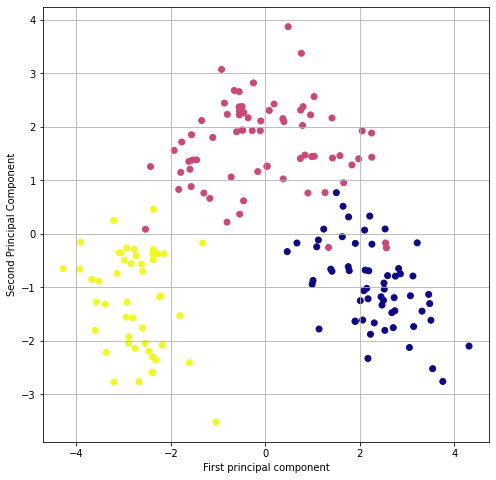

In [9]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca_2 = pca.transform(X_scaled)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_2, y, test_size=0.3, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

plt.figure(figsize=(8,8))
plt.scatter(X_pca_2[:,0],X_pca_2[:,1],c=y,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.grid(True)

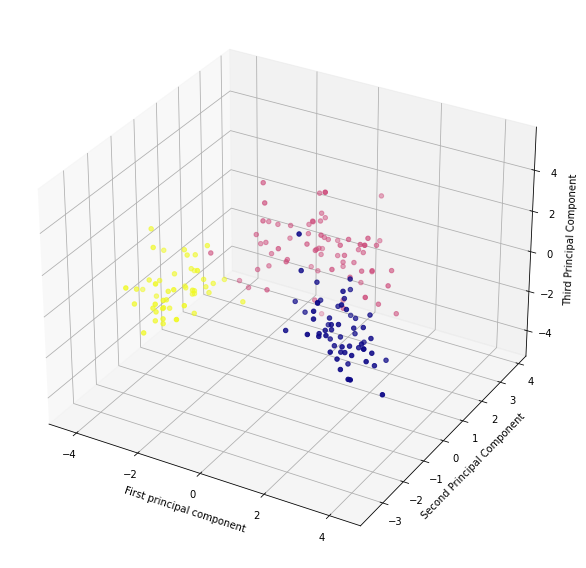

In [30]:
pca = PCA(n_components=3)
pca.fit(X_scaled)
X_pca_2 = pca.transform(X_scaled)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_2, y, test_size=0.3, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.scatter(X_pca_2[:,0],X_pca_2[:,1],X_pca_2[:,2],c=y,cmap='plasma')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.grid(True)


In [31]:
score

[0.7222222222222222,
 0.8333333333333334,
 0.9629629629629629,
 0.9629629629629629,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815]